<a href="https://colab.research.google.com/github/dsogden/NLP-Specialization/blob/main/Chap1_W4_Hash_Functions_Multiplanes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pprint
import matplotlib.pyplot as plt

pp = pprint.PrettyPrinter(indent=4)
def plot_vectors(vectors, colors=['k', 'b', 'r', 'm', 'c'], axes=None, fname='image.svg', ax=None):
    scale = 1
    scale_units = 'x'
    x_dir = []
    y_dir = []

    for i, vec in enumerate(vectors):
        if vec.shape[0] == 1:     # row vector
            x_dir.append(vec[0][0])
            y_dir.append(vec[0][1])
        elif vec.shape[1] == 1:   # column vector
            x_dir.append(vec[0][0])
            y_dir.append(vec[1][0])

    if ax == None:
        fig, ax2 = plt.subplots()
    else:
        ax2 = ax

    if axes == None:
        x_axis = 2 + np.max(np.abs(x_dir))
        y_axis = 2 + np.max(np.abs(y_dir))
    else:
        x_axis = axes[0]
        y_axis = axes[1]

    ax2.axis([-x_axis, x_axis, -y_axis, y_axis])

    for i, vec in enumerate(vectors):
        if vec.shape[0] == 1:     # row vector
            ax2.arrow(0, 0, vec[0][0], vec[0][1], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])
        elif vec.shape[1] == 1:   # column vector
            ax2.arrow(0, 0, vec[0][0], vec[1][0], head_width=0.05 * x_axis, head_length=0.05 * y_axis, fc=colors[i], ec=colors[i])

    if ax == None:
        plt.show()

In [3]:
def basic_hash_table(value_list, n_buckets):
    def hash_function(value, n_buckets):
        return int(value) % n_buckets
    hash_table = {i: [] for i in range(n_buckets)}
    for value in value_list:
        hash_value = hash_function(value, n_buckets)
        hash_table[hash_value].append(value)

    return hash_table

In [6]:
value_list = [100, 10, 14, 17, 97]
hash_table_example = basic_hash_table(value_list, 10)
pp.pprint(hash_table_example)

{   0: [100, 10],
    1: [],
    2: [],
    3: [],
    4: [14],
    5: [],
    6: [],
    7: [17, 97],
    8: [],
    9: []}


In [7]:
value_list = [100, 10, 14, 17, 97]
hash_table_example = basic_hash_table(value_list, 5)
pp.pprint(hash_table_example)

{0: [100, 10], 1: [], 2: [17, 97], 3: [], 4: [14]}


## Planes

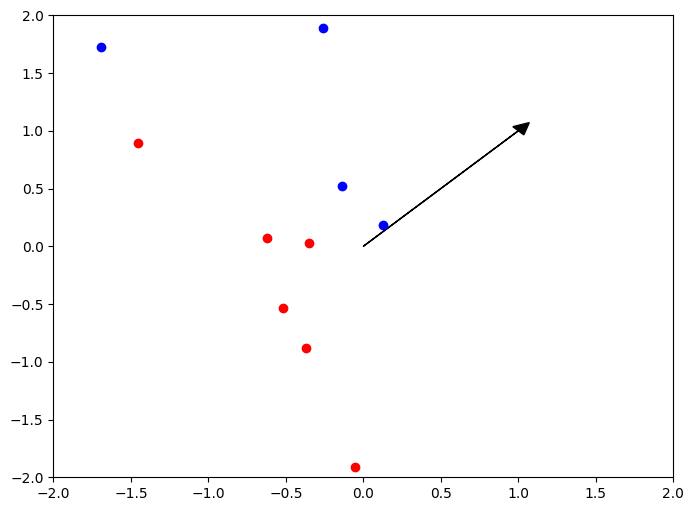

In [9]:
P = np.array([[1, 1]])
fig, ax = plt.subplots(figsize=(8, 6))
plot_vectors([P], axes=[2, 2], ax=ax)

for i in range(10):
    v1 = np.array(np.random.uniform(-2, 2, 2))
    side_of_plane = np.sign(np.dot(P, v1.T))

    if side_of_plane == 1:
        ax.plot(v1[0], v1[1], 'bo')
    else:
        ax.plot(v1[0], v1[1], 'ro')
plt.show()

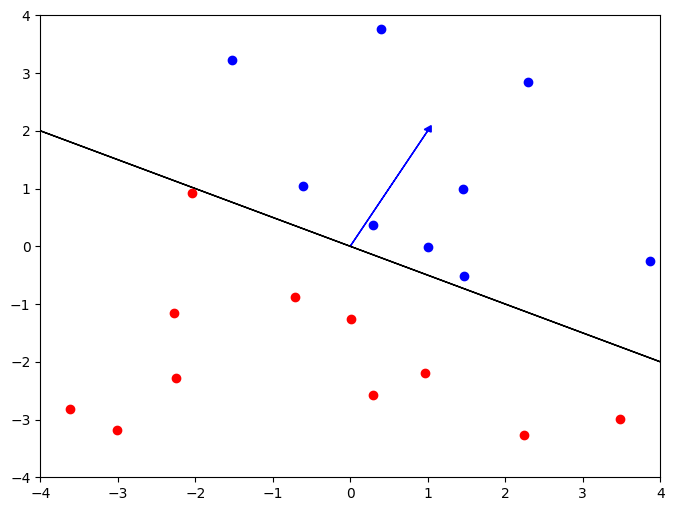

In [12]:
P = np.array([[1, 2]])
PT = np.dot([[0, 1], [-1, 0]], P.T).T

fig, ax = plt.subplots(figsize=(8, 6))
plot_vectors([P], axes=[2, 2], colors='b', ax=ax)
plot_vectors([PT * 4, PT * -4], colors=['k', 'k'], axes=[4, 4], ax=ax)

# Plot 20 random points.
for i in range(0, 20):
        v1 = np.array(np.random.uniform(-4, 4, 2)) # Get a pair of random numbers between -4 and 4
        side_of_plane = np.sign(np.dot(P, v1.T)) # Get the sign of the dot product with P
        # Color the points depending on the sign of the result of np.dot(P, point.T)
        if side_of_plane == 1:
            ax.plot([v1[0]], [v1[1]], 'bo') # Plot a blue point
        else:
            ax.plot([v1[0]], [v1[1]], 'ro') # Plot a red point

plt.show()
